# Boston Housing Dataset: Linear Regression Analysis


**Dataset Description**

The Boston Housing Dataset consists of 506 samples with 13 feature variables and 1 target variable:

    1. CRIM: Per capita crime rate by town

    2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

    3. INDUS: Proportion of non-retail business acres per town

    4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

    5. NOX: Nitric oxides concentration (parts per 10 million)

    6. RM: Average number of rooms per dwelling

    7. AGE: Proportion of owner-occupied units built prior to 1940

    8. DIS: Weighted distances to five Boston employment centers

    9. RAD: Index of accessibility to radial highways

    10. TAX: Full-value property-tax rate per $10,000

    11. PTRATIO: Pupil-teacher ratio by town

    12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town

    13. LSTAT: % lower status of the population

Target variable:
* MEDV: Median value of owner-occupied homes in $1000's

____________________

## 1. Data Preparation (5 points)

1.1. To prepare the data,  load the data from ‘housing.csv’, identify the 13 feature variables mentioned above, and using the pandas library, print or display the first five rows of the dataset (1 point)

1.2. Visualize the dataset:  Create a scatterplot of RM (average number of rooms) vs MEDV (median home value), and another scatterplot of LSTAT vs MEDV (2 points).


In [383]:
# Answers here
import pandas as pd
housing=pd.read_csv("housing.csv")
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0, 0.5, 'Median Home Value')

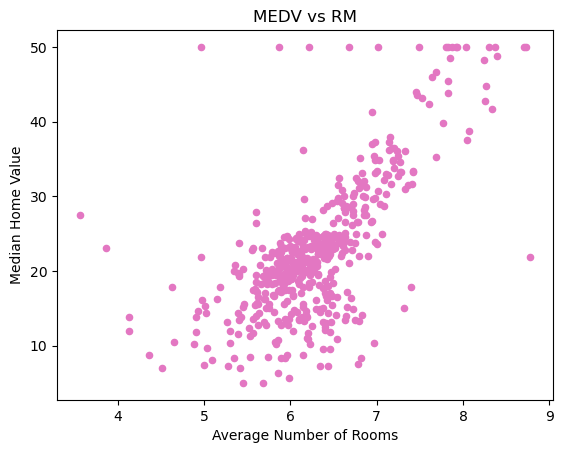

In [384]:
import matplotlib.pyplot as plt
x=housing["RM"]
y=housing["MEDV"]
plt.scatter(x,y, c="tab:pink",s=20)
plt.title("MEDV vs RM")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Home Value")

Text(0, 0.5, 'Median Home Value')

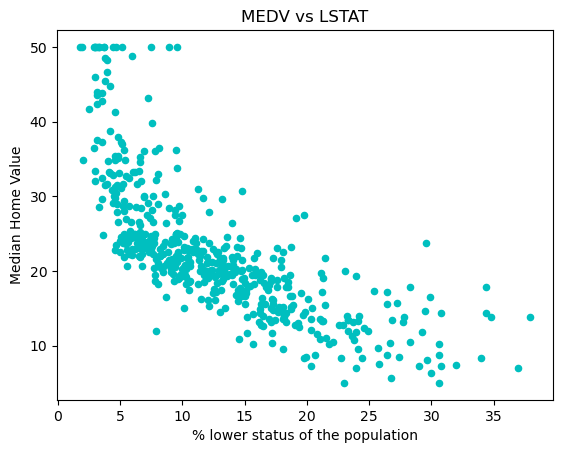

In [385]:
x=housing["LSTAT"]
y=housing["MEDV"]
plt.scatter(x,y,c="c",s=20)
plt.title("MEDV vs LSTAT")
plt.xlabel("% lower status of the population")
plt.ylabel("Median Home Value")

1.3. Calculate the correlation matrix between all features, and plot it as a heatmap (2 points).

<Axes: >

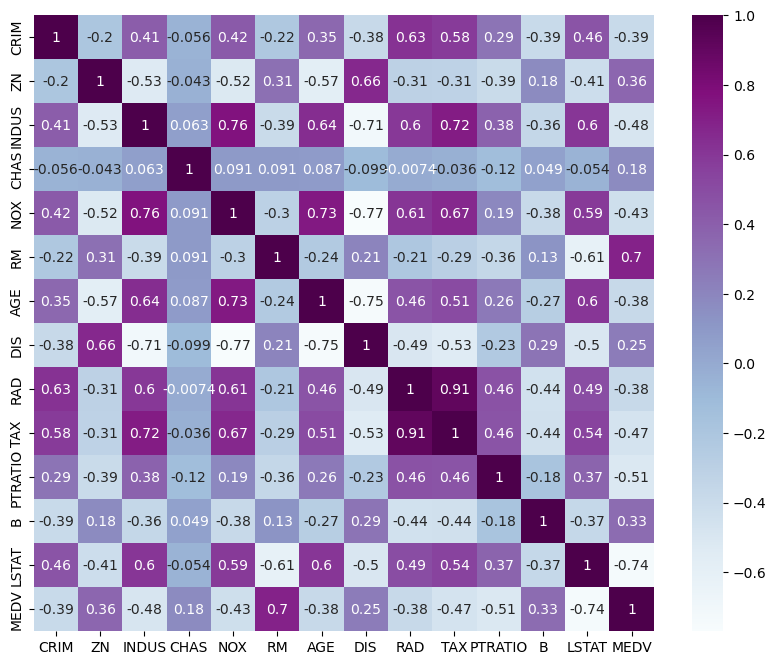

In [387]:
# Answers here
cor_matrix=housing.corr()
import seaborn as sns
plt.figure (figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap="BuPu")

## 2. Linear Regression (20 points)

2.1. Implement a linear regression model using only the 'RM', 'LSTAT' and 'PTRATIO' features to predict 'MEDV'. (3 points)

2.2. Fit the model on the training data and make predictions on the test data. (3 points)

2.3. Calculate and print the Mean Squared Error (MSE) and R-squared score for both training and test sets. (3 points)

2.4. Make a scatterplot comparing the actual 'MEDV' values vs. the predicted 'MEDV' values. (3 points)

In [389]:
# Answers here
X=housing[["RM", "LSTAT", "PTRATIO"]]
y=housing["MEDV"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=2022)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [390]:
y_test_pred=lr.predict(X_test)
test_pred_MEDV=y_test_pred
y_train_pred=lr.predict(X_train)
train_pred_MEDV=y_train_pred

In [391]:
from sklearn.metrics import mean_squared_error
print("The MSE for the testing data is:", mean_squared_error(y_test, y_test_pred))
print("The MSE for the training data is:", mean_squared_error(y_train, y_train_pred))

The MSE for the testing data is: 32.48726352582226
The MSE for the training data is: 26.171295593842995


In [392]:
print("The R^2 score for the training data is:", lr.score(X_train,y_train))
print("The R^2 score for the testing data is:", lr.score(X_test,y_test))

The R^2 score for the training data is: 0.6968554533253989
The R^2 score for the testing data is: 0.5456019403066887


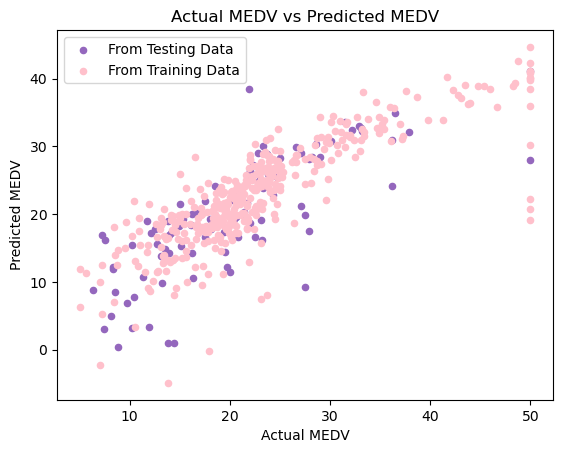

In [393]:
plt.scatter(y_test, y_test_pred,c="tab:purple", s=20)
plt.scatter(y_train,y_train_pred, c="pink", s=20)
plt.title("Actual MEDV vs Predicted MEDV")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.legend(["From Testing Data", "From Training Data"])

2.5.  Implement a linear regression model using all features. (3 points).

2.6.  Make a scatterplot comparing the actual 'MEDV' values vs. the predicted 'MEDV' values. (2 points).

2.7.  Compare its performance with the simple linear regression model using the metrics discussed so far. Which one does better? Print the result. (3 points)

In [395]:
# Answers here
X=housing.drop(columns=["MEDV"])
y=housing["MEDV"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)
lr.fit(X_train,y_train)

LinearRegression()

In [396]:
y_pred=lr.predict(X_test)
predicted_MEDV=y_pred
predicted_MEDV_train=lr.predict(X_train)

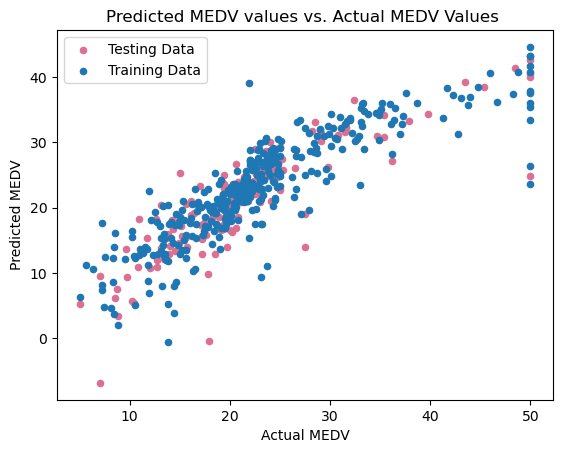

In [397]:
x=predicted_MEDV
y=y_test
plt.scatter(y_test,predicted_MEDV,c="palevioletred", s=20)
plt.scatter(y_train, predicted_MEDV_train,s=20)
plt.title("Predicted MEDV values vs. Actual MEDV Values ")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.legend(["Testing Data","Training Data"])


In [398]:
print("The R^2 score is:", lr.score(X_test,y_test))
print("The MSE is:", mean_squared_error(y, y_pred))

The R^2 score is: 0.7112260057484852
The MSE is: 21.51744423117781


In [399]:
print("The simple regression has a lower R-squared value, meaning it does not fit the model as well and will be less accurate in predicting future \noutcomes than the linear regression that used all the feautures. The simpler regression explains less of the variability in the predicted \nMEDV. The model that used all features has a greater R-squared value indicating that it fits the data better and explains a greater \nproportion of the variance in the predicted MEDV. The more complex model also has a lower mean squared error value, meaning it has a \nsmaller error and will be better at estimating the MEDV. The complex model was better at recognising a pattern in the data and generalising.  In conclusion, the model that used all feautures does a better job at predicting MEDV than the simpler model. ")

The simple regression has a lower R-squared value, meaning it does not fit the model as well and will be less accurate in predicting future 
outcomes than the linear regression that used all the feautures. The simpler regression explains less of the variability in the predicted 
MEDV. The model that used all features has a greater R-squared value indicating that it fits the data better and explains a greater 
proportion of the variance in the predicted MEDV. The more complex model also has a lower mean squared error value, meaning it has a 
smaller error and will be better at estimating the MEDV. The complex model was better at recognising a pattern in the data and generalising.  In conclusion, the model that used all feautures does a better job at predicting MEDV than the simpler model. 


_______________

## 3. Comparing Linear Regression with Polynomial Regression (15 points)

3.1. Implement a linear regression model and a polynomial regression model with degree 2 (a quadratic equation) using the 'RM' feature to predict 'MEDV'. Do a train-test split, and compare how they perform by printing off their R² values on both the train and test data. (4 points)

3.2.  Create a scatter plot showing the predictions of both linear and polynomial models on the same graph, against the actual data. (3 points)

In [401]:
# 3.1 Answers
X=housing[["RM"]]
y=housing["MEDV"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)
lr.fit(X_train,y_train)


LinearRegression()

In [402]:
y_pred_lr=lr.predict(X_test)
pred_MEDV_lr=y_pred_lr

In [403]:
print("The R^2 value for the linear regression training data is:",lr.score(X_train, y_train))
print("The R^2 value for the linear regression testing data is:",lr.score(X_test, y_test))

The R^2 value for the linear regression training data is: 0.4878892853275991
The R^2 value for the linear regression testing data is: 0.4584649934303068


In [404]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [405]:
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

In [406]:
poly.fit(X_poly_train, y_train)

PolynomialFeatures()

In [407]:
lr.fit(X_poly_train, y_train)

LinearRegression()

In [408]:
y_pred_pl=lr.predict(X_poly_test)
pred_MEDV_pl=y_pred_pl

In [409]:
print("The R^2 value for the polynomail regression training data is:",lr.score(X_poly_train, y_train))
print("The R^2 value for the polynomail regression testing data is:",lr.score(X_poly_test, y_test))

The R^2 value for the polynomail regression training data is: 0.5354624414575766
The R^2 value for the polynomail regression testing data is: 0.5685094410898874


The polynomial regression has a greater R^2 value. The polynomail regression explains more of the variation around the predicted MEDV than the linear regression model does. Therefore, the polynomial regression fits the data better and performs better than the linear regression.

In [411]:
#3.2 Answers

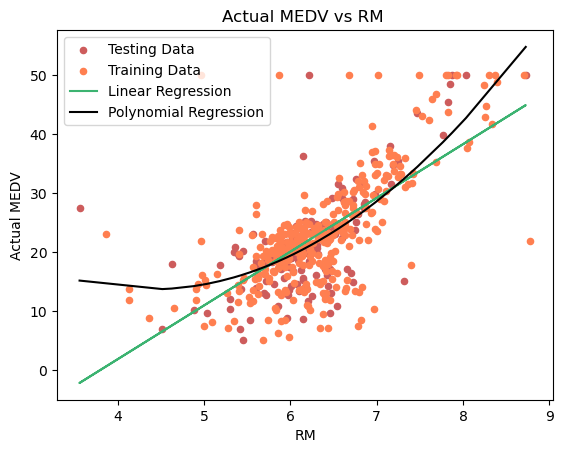

In [412]:
plt.scatter(X_test, y_test,c="indianred", s=20, label="Testing Data")
plt.scatter(X_train, y_train, c="coral",s=20, label="Training Data")
plt.plot(X_test,pred_MEDV_lr, c="mediumseagreen", label="Linear Regression")

#Used Generative AI to learn how to smoothen out my polynomial regression line.
sorted=X_test.values.flatten().argsort()
X_sorted=X_test.values.flatten()[sorted]
X_sorted_poly=pred_MEDV_pl[sorted]

plt.plot(X_sorted, X_sorted_poly,c="black", label="Polynomial Regression")
plt.title("Actual MEDV vs RM ")
plt.xlabel("RM")
plt.ylabel("Actual MEDV")
plt.legend()

3.3.  Implement polynomial regression with degrees 1, 2, 3, and 4 using the feature `RM`. Make a plot of their  `mean squared error` to compare their performances using cross-validation. (4 points)

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [414]:
# Answers here

In [415]:
from sklearn.model_selection import cross_val_score
X=housing[["RM"]]
y=housing["MEDV"]
degree_list=[1,2,3,4]
MSE_list=[]
for i in degree_list:
    poly=PolynomialFeatures(degree=i)
    X_poly=poly.fit_transform(X)
    poly.fit(X_poly, y)
    lr.fit(X_poly, y)
    y_p_pred=lr.predict(X_poly)
    pred_MEDV=y_p_pred
    MSE=-cross_val_score(lr, X_poly, y, scoring="neg_mean_squared_error")
    MSE_avg=MSE.mean()
    MSE_list.append(MSE_avg)
    print("The mean squared error for degree",i, "is", MSE_avg)


The mean squared error for degree 1 is 52.719811950004306
The mean squared error for degree 2 is 42.86213625686982
The mean squared error for degree 3 is 42.46511678255838
The mean squared error for degree 4 is 45.9365040167142


Text(0, 0.5, 'MSE')

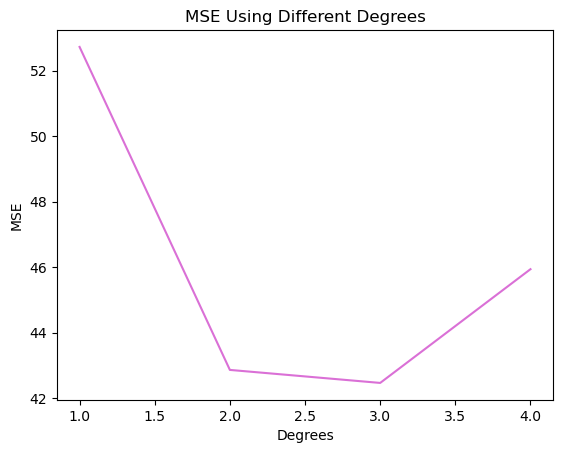

In [416]:
plt.plot(degree_list, MSE_list,c="orchid")
plt.title("MSE Using Different Degrees")
plt.xlabel("Degrees")
plt.ylabel("MSE")

**3.4. Discuss the trade-offs between model complexity and performance. Consider concepts such as overfitting, underfitting, and the bias-variance tradeoff. (4 points)**

As you increase the number of features used to train a model, it becomes more complex. More complex models take longer to train and do not necessarily result in better performance. Using too many features can result in overfitting. Including non-relevant features creates noise,  making it more difficult for the model to learn and results in a high variance. When a model is overfitted, it performs well with the training data but lacks the ability to generalise and predict from testing and unseen data accuratley.

However, using a simpler model with too few  features can lead to underfitting, as the model might not have enough information to recognise a pattern in the data and generalise. Using too few features results in the model having a high bias to these features and a loss of variability. Due to this, the model fails to take into account other features which may be more significant and places too high of a significance on the selected features.

In order to achieve the best performance, it is important to find a balance between model complexity, bias, and variance. A model should not have too high a bias or too low a variance. A balanced bias-variance tradeoff is imperative for model optimisation. It results in a model that does not overfit or underfit data and can make accurate predictions from unseen data.

## 4. Feature Selection (10 points)

**4.2. Discuss the impact of feature selection on model performance and interpretability. (5 points)**


Feature selection is extremely important to consider when training a machine learning model, as it affects how accurate a model's predictions are. Too many features can result in overfitting, while too few features can result in underfitting. Proper feature selection is necessary to create a better performing model that is not over or under fitted and can generalise and predict unseen data accurately. There are many methods available for feature selection; however, the main point is to select an appropriate amount of features that are actually relevant to predicting the target feature. This results in increased overall performance. 

A simpler model with fewer features is a lot easier to interpret, allowing you to understand which features are truly influential. On the other hand, a more complex model takes into account many features, which makes it difficult to interpret and determine what the most significant and influential features are. 

The tradeoff between feature selection and interpretability is vital to consider when training a model. If understanding the reason behind each decision important, then you should select an appropriate amount of features to keep the model interpretable without sacrificing its accuracy. 

______________

# Part B - Classification

## 5. Data Preparation and Exploration (5 points)

5.1	Load the MNIST dataset (`mnist_train.csv` and `mnist_test.csv`) using the pandas library. (1 point)

5.2	Separate features (X) and labels (y) for both train and test data. (1 point)

5.3	Normalize values of the features (X) so they are between 0 and 1. (1 point)

5.4 The input variables (X) should be 784-dimensional vectors. These actually represent 28x28 pixel images[1], but with all pixels represented as individual features. With that in mind, take 5 random data points (i.e. 5 random rows of the dataset), reshape them[2] from 784-dimensional vectors into 28x28 matrices, and display them (2 points).

[1] - https://en.wikipedia.org/wiki/MNIST_database

[2] - https://numpy.org/doc/2.0/reference/generated/numpy.reshape.html

In [426]:
# Answers here
mn_train=pd.read_csv("mnist_train.csv")
mn_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [427]:
mn_test=pd.read_csv("mnist_test.csv")
mn_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
X_train=mn_train.iloc[:,1:]
y_train=mn_train.iloc[:,0]
X_test=mn_test.iloc[:,1:]
y_test=mn_test.iloc[:,0]

In [429]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)
X_train_array=np.array(X_train_norm)
X_test_norm=scaler.fit_transform(X_test)
X_test_array=np.array(X_test_norm)

In [430]:
y_train_array=np.array(y_train)
y_test_array=np.array(y_test)

In [431]:
print("Normalized X_train:", X_train_array)

Normalized X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [432]:
print("Normalized X_test:",X_test_array)

Normalized X_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


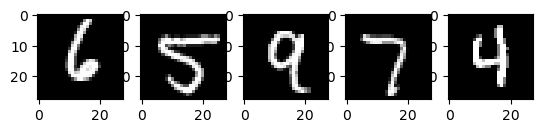

In [536]:
random_rows=np.random.choice(X_train_array.shape[0], 5, replace=False)
random_images=X_train_array[random_rows]
reshaped_images=random_images.reshape(5, 28, 28)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(reshaped_images[i], cmap="grey")

## 6. Classification using a Perceptron (15 points)

We will use the Perceptron classifier to distinguish between digit '0' and digit '1'. Use only the subset of the data corresponding to these two digits. 

6.1. 	Train the Perceptron on the training data for this binary classification task. (3 points)

6.2. 	Evaluate the Perceptron on the test set. Print out the test accuracy. (3 points)

6.3. 	Plot the confusion matrix showing how well the classifier performs on the test set for this binary task. (3 points)

6.4. Calculate and print the precision, recall, and F1 score for the Perceptron classifier. (3 points)

In [435]:
X_train_array=np.array(mn_train.iloc[:,1:])
y_train_array=np.array(mn_train.iloc[:,0])
X_test_array=np.array(mn_test.iloc[:,1:])
y_test_array=np.array(mn_test.iloc[:,0])

In [436]:
# Answers here
b_train=(y_train_array==0) | (y_train_array==1)
X_train_b=X_train_array[b_train]
y_train_b=y_train_array[b_train]

In [437]:
b_test=(y_test_array==0) | (y_test_array==1)
X_test_b=X_test_array[b_test]
y_test_b=y_test_array[b_test]

In [438]:
from sklearn.linear_model import Perceptron
perc=Perceptron()
perc.fit(X_train_b, y_train_b)

Perceptron()

In [439]:
y_pred=perc.predict(X_test_b)
predicted=y_pred

In [440]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_test_b, y_pred))

The accuracy score is: 0.9985815602836879


Text(0.5, 1.0, 'Binary Classification Confusion Matrix')

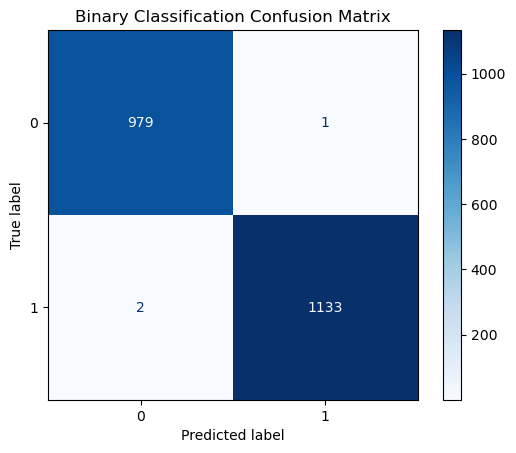

In [441]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test_b, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.title("Binary Classification Confusion Matrix")

In [442]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("The precision score is:", precision_score(y_test_b, y_pred))
print("The recall score is:", recall_score(y_test_b, y_pred))
print("The F1 score is:", f1_score(y_test_b, y_pred))


The precision score is: 0.9991181657848325
The recall score is: 0.9982378854625551
The F1 score is: 0.998677831643896


#### 6.5 Implement a multi-class Perceptron classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [444]:
# Answers here

In [445]:
perc.fit(X_train_array, y_train_array)

Perceptron()

In [446]:
y_pred_m=perc.predict(X_test_array)
predicted_m=y_pred

In [447]:
print("The accuracy score is:", accuracy_score(y_test_array, y_pred_m))
print("The precision score is:", precision_score(y_test_array, y_pred_m, average="weighted"))
print("The recall score is:", recall_score(y_test_array, y_pred_m, average="weighted"))
print("The F1 score is:", f1_score(y_test_array, y_pred_m, average="weighted"))

The accuracy score is: 0.8805880588058805
The precision score is: 0.8922766246021521
The recall score is: 0.8805880588058805
The F1 score is: 0.8821475220323272


#### 6.6 Plot a confusion matrix for your multi-class classifier. (1 point)

Text(0.5, 1.0, 'Multi-Class Classifier Confusion Matrix')

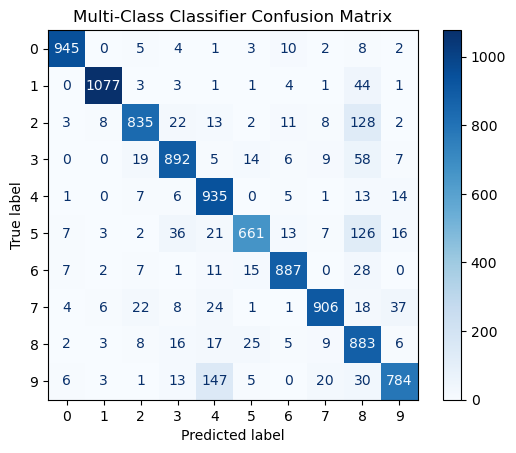

In [449]:
# Answers here
cmm=confusion_matrix(y_test_array, y_pred_m)
dispm=ConfusionMatrixDisplay(cmm)
dispm.plot(cmap="Blues")
plt.title("Multi-Class Classifier Confusion Matrix")


## 7. Classification with Logistic Regression (15 points)

Now we will implement a Logistic Regression classifier for the same binary classification task as with the perceptron.

7.1. 	Train the Logistic Regression model on the training data for this binary classification task. (3 points)

7.2. 	Evaluate the Logistic Regression model on the test set. Print out the test accuracy. (3 points)

7.3. 	Plot the confusion matrix for the Logistic Regression model on this binary task. (3 points)

7.4. 	Calculate and print the precision, recall, and F1 score for the Logistic Regression classifier (3 points)


In [451]:
# Answers here
b_train=(y_train_array==0) | (y_train_array==1)
X_train_b=X_train_array[b_train]
y_train_b=y_train_array[b_train]

b_test=(y_test_array==0) | (y_test_array==1)
X_test_b=X_test_array[b_test]
y_test_b=y_test_array[b_test]


In [452]:
from sklearn.linear_model import LogisticRegression
ltr=LogisticRegression()
ltr.fit(X_train_b, y_train_b)

LogisticRegression()

In [453]:
y_ltr_pred=ltr.predict(X_test_b)
print("The accuracy score is:", accuracy_score(y_test_b, y_ltr_pred))

The accuracy score is: 0.9990543735224586


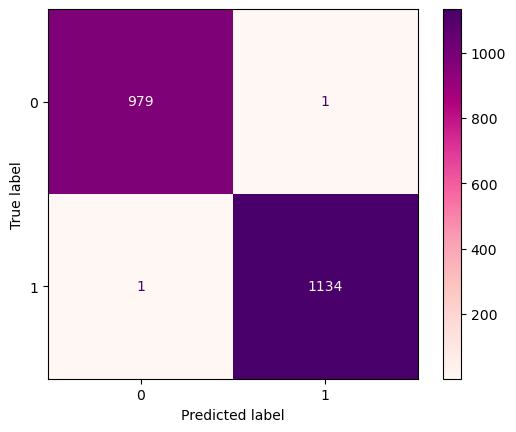

In [454]:
cm=confusion_matrix(y_test_b, y_ltr_pred)
matrix=ConfusionMatrixDisplay(cm)
matrix.plot(cmap="RdPu")

In [455]:
print("The precision score is:", precision_score(y_test_b, y_ltr_pred))
print("The recall score is:", recall_score(y_test_b, y_ltr_pred))
print("The F1 score is:", f1_score(y_test_b,y_ltr_pred))

The precision score is: 0.9991189427312775
The recall score is: 0.9991189427312775
The F1 score is: 0.9991189427312775


#### 	7.5 Implement a multi-class Logistic Regression classifier for all 10 digits. Train and evaluate it on the full dataset. Print the overall accuracy. (2 points)

In [457]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ltr=LogisticRegression(max_iter=1000)
X_train_scaled=scaler.fit_transform(X_train_array)
X_test_scaled=scaler.transform(X_test_array)
#Used genAI to learn how to fix convergence error

In [458]:
ltr.fit(X_train_scaled,y_train_array)

LogisticRegression(max_iter=1000)

In [459]:
y_pred=ltr.predict(X_test_scaled)
print("Accuracy score is:", accuracy_score(y_test_array, y_pred))

Accuracy score is: 0.921992199219922


#### 7.6 Plot the confusion matrix for the multi-class Logistic Regression classifier. (1 point)

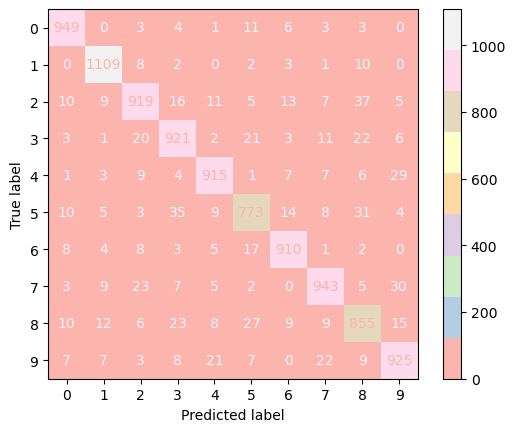

In [461]:
# Answers here
cm=confusion_matrix(y_test_array, y_pred)
matrix=ConfusionMatrixDisplay(cm)
matrix.plot(cmap="Pastel1")


## 8. Model Comparison and Analysis (7 points)

8.1. For the multi-class Logistic Regression model, identify the three digits that are most frequently misclassified (i.e. classified wrong). Using the same `numpy.reshape` code as in question 5.4, display example images of these misclassified data points (4 points)

In [463]:
# Answers here
matrix_df=pd.DataFrame(cm)
misclass=matrix_df.sum(axis=1)-np.diag(matrix_df)
m_sort=misclass.sort_values(ascending=False)
print(m_sort)
print("The 3 most frequently misclassified digits are 5, 8, and 2")

5    119
8    119
2    113
3     89
7     84
9     84
4     67
6     48
0     31
1     26
dtype: int64
The 3 most frequently misclassified digits are 5, 8, and 2


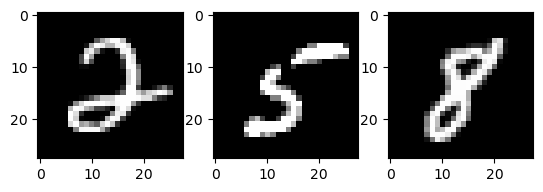

In [464]:
mis_clas=(y_train_array==5) | (y_train_array==8)| (y_train_array==2)
new_images=X_train_array[mis_clas]
new5=new_images[10]
new8=new_images[3]
new2=new_images[2]
reshaped_images5=new5.reshape(28,28)
reshaped_images8=new8.reshape(28,28)
reshaped_images2=new2.reshape(28,28)
plt.subplot(1,3,1)
plt.imshow(reshaped_images2, cmap="grey")
plt.subplot(1,3,2)
plt.imshow(reshaped_images5, cmap="grey")
plt.subplot(1,3,3)
plt.imshow(reshaped_images8, cmap="grey")

**8.2. Compare the performance of the Perceptron and Logistic Regression models on the binary classification and multi-class tasks. Which performed better? Explain why you think this is the case (3 points)**


In the binary and multi classification tasks, the logistic regression model had a higher precision score. This shows that it had a better ratio between true positives and all positives. Secondly, the logistic regression had a higher recall score than the perceptron, indicating that it was better at identifying instances of the positive class. Furthermore, the logistic regression had a greater accuracy score than the perceptron, indicating that it was better at making accurate predictions. Additionally, the logistic regression model had a higher F1 score. In conclusion, based on all the metrics, the logistic regression model performed better.

#Used GenAI to make sure my explanation was correct.

## 9. Understanding Machine Learning (8 points)

**9.1. How might you modify the input data or feature representation to potentially improve the performance of these models on the MNIST dataset? Suggest at least two specific techniques (4 points).**

The input data can be modified using data augmentation. This involves applying transformations like dilation, rotation, reflection, flipping, etc to the dataset in order to create different variations of the dataset. Applying transformations to the data, enables the model to learn to recognise the digits even if they look slightly different. This aids in preventig overfitting and increases the models generalising and predictive capabilities. Additionally, histogram equalisation could be used to improve feature representation. This is an intensity transformation process that would improve the contrast of the MNIST digit images. This would enhance the images' visibilty and aid the model in recognising digits better, leading to an overall increase in model performance.
#Used genAI to help research data modification

**9.2. Explain the importance of the train-test split in this context. What might happen if you trained and evaluated the models on the entire dataset without splitting?  (4 points)**

It is important to carry out a train-test split on our data to ensure that the model is able to make accurate predictions on unseen data. Training the model using only training data and then testing it on testing data enables us to assess whether the model was able to recognise a pattern in the data and use this pattern to generalise. It also allows us to see whether the data has been overfitted or underfitted. 

Evaluating the models on the entire dataset of digit images would not allow us to test whether the model is able to generalise. This is because the model already knows what the output is supposed to be and could likely have just memorised the data instead of recognising a pattern. The model would be overfitted, leading to poor performance on unseen data. 

Having testing data allows you to evaluate the model's predictive capabilities on unseen data, in this case unseen images of digits, and simulate how it would work in real world scenarios.
